In [1]:
import os
os.chdir('..')

In [2]:
import nmrglue as ng
import numpy as np
from cops_analysis import cops_analyze
from cops_prediction import gaussian, int_seq_match, print_probabilities
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%%time
b = cops_analyze(['./SHP2_Gradcops/SHP2_Grad1.ft3',
                  './SHP2_Gradcops/SHP2_Grad3.ft3',
                  './SHP2_Gradcops/SHP2_Grad5.ft3',
                  './SHP2_Gradcops/SHP2_Grad6.ft3'],
                 mode='HNCA', cop_num=[1,2,4,5], pyruvate_on=False)





CPU times: user 10.7 s, sys: 7.28 s, total: 18 s
Wall time: 18 s


In [30]:
#removed index 342: CA way too low!
tb = pd.read_csv('./dev/SHP2_processed.csv', sep='\t')
tb = tb.rename(columns={'w1':'HN','w2':'CA','w3':'N'})
tb = tb.drop([342])
tb = tb.reset_index()

#realign spectra
shifts_array = tb[['CA', 'N','HN']].to_numpy(dtype=np.float32)
shifts_array[:,[0,1]]=shifts_array[:,[1,0]]
shifts_array[0]

array([129.36499,  48.55583,   7.60125], dtype=float32)

In [31]:
%%time
prediction = []
error = []
CB = []
for i in shifts_array:
    try:
        out = print_probabilities(b, i[1], i, True, False, tms_shift=3.12)
        print(out[2])
        prediction.append(out[0].astype(str).to_numpy())
        error.append(out[2])
        CB.append(out[1])
    except:
        prediction.append("invalid or glycine peak selection.")
        error.append(0)
        CB.append(0)


 peak shifts: [129.36499  48.55583   7.60125]
predicted Cb: 20.22ppm
0.0104994832219762

 peak shifts: [127.61668  57.50206   7.35108]
predicted Cb: 23.39ppm
0.08220513045182341

 peak shifts: [124.96531  57.57096   7.10819]
predicted Cb: 35.53ppm
0.04409211556439977

 peak shifts: [124.82412  63.28477   7.05406]
predicted Cb: 11.42ppm
0.0877157108029545

 peak shifts: [123.71404  52.88781   7.1818 ]
predicted Cb: 25.29ppm
0.05941653801885976

 peak shifts: [124.7177   52.66874   7.25808]
predicted Cb: 10.13ppm
0.11557158652818907

 peak shifts: [124.3973   51.8212    7.28145]
predicted Cb: 10.71ppm
0.20471358136085852

 peak shifts: [123.28444  55.85202   6.92015]
predicted Cb: 23.41ppm
0.09764318007433172

 peak shifts: [126.17585  52.06431   6.16323]
predicted Cb: 36.84ppm
1.1769040913841848

 peak shifts: [118.6784   50.82346   6.25353]
predicted Cb: 27.44ppm
0.8468804937377749

 peak shifts: [116.81376  49.76423   6.60254]
predicted Cb: 26.74ppm
0.8454144565792896

 peak shifts: 

In [32]:
tb['Type prediction'] = prediction
tb['CB prediction error'] = error
tb['predicted CB'] = CB

In [33]:
tb

,index,HN,CA,N,Assign F1,Assign F2,Assign F3,is_sequential,Assignment,Type prediction,CB prediction error,predicted CB
0,0,7.60125,48.55583,129.36499,{424}[1636],{424}[1637],{424}[1635],False,1637,"[[A, 1.0]]",0.010499,20.22
1,1,7.35108,57.50206,127.61668,{425}[1641],{425}[1642],{425}[1640],False,1642,"[[C, 1.0]]",0.082205,23.39
2,2,7.10819,57.57096,124.96531,{427}[1646],{427}[1647],{427}[1645],False,1647,"[[I, 0.69], [Y, 0.31]]",0.044092,35.53
3,3,7.05406,63.28477,124.82412,{428}[1651],{428}[1653],{428}[1650],False,1653,"[[X, 1.0]]",0.087716,11.42
4,4,7.18180,52.88781,123.71404,{429}[1656],{429}[1657],{429}[1655],False,1657,"[[Q, 0.42], [H, 0.24], [E, 0.16], [R, 0.08], [...",0.059417,25.29
...,...,...,...,...,...,...,...,...,...,...,...,...
740,741,8.54611,59.58806,117.40428,{831}[3579],[3638],{831}[3578],True,3638,"[[W, 0.76], [C, 0.24]]",2.476513,25.35
741,742,7.96637,53.08762,121.39876,{832}[3584],[3591],{832}[3583],True,3591,"[[L, 0.52], [D, 0.26], [Y, 0.21], [C, 0.01]]",1.787484,38.70
742,743,7.98456,53.74604,121.28429,{833}[3589],[3631],{833}[3588],True,3631,"[[E, 0.54], [R, 0.17], [H, 0.1], [Q, 0.05], [W...",0.910279,27.19
743,744,8.48577,55.27238,121.10343,{836}[3600],[3603],{836}[3599],True,3603,"[[S/T, 1.0]]",1.291804,43.91


3047
[115.86905  61.22154   8.16599]
   peak  likelihood
0  3281        0.98
1  2795        0.52
2  2341        0.44
3  2309        0.17
4  2212        0.10
CPU times: user 814 ms, sys: 4.03 ms, total: 818 ms
Wall time: 817 ms


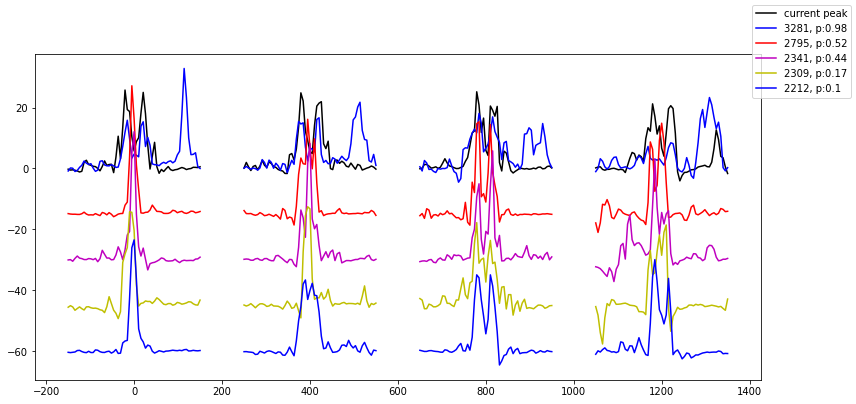

In [34]:
%%time
a = int_seq_match(b, peak_table_dir = tb, cops_mode='HNCA')
index = 280
print(tb['Assignment'][index])
print(shifts_array[index])
df, fig = a.find_best_matches(shifts_array[index], snr=25,gen_plot=True, verbose=False, sequential_mode=~tb['is_sequential'][index])
print(df)

In [35]:
%%time
prediction = []
for ind, row in tb[~tb['is_sequential']].iterrows():
    
    try:
        df, _ = a.find_best_matches(shifts_array[ind], snr=25,gen_plot=False, label=row['Assignment'], verbose=False, sequential_mode=True)
        df['peak']=df['peak'].astype(str)
        prediction.append(df.to_numpy())
        #plt.savefig('./dev/shp2_plots/internal_peaks/plt_%i' %row['Assignment'])
        #plt.cla()
        #plt.close(fig)
    except:
        prediction.append(["no sequential peak within CA range."])
        pass

tb.loc[~tb['is_sequential'], 'prediction'] = prediction

CPU times: user 1.24 s, sys: 0 ns, total: 1.24 s
Wall time: 1.25 s


/home/nmrbox/hwang/miniconda3/envs/nmr/lib/python3.9/site-packages/pandas/core/dtypes/missing.py:550: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.array(val, copy=False)
/home/nmrbox/hwang/miniconda3/envs/nmr/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/home/nmrbox/hwang/miniconda3/envs/nmr/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:883: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of list

In [36]:
%%time
prediction = []
for ind, row in tb[tb['is_sequential']].iterrows():
    
    try:
        df, _ = a.find_best_matches(shifts_array[ind], snr=25,gen_plot=False, label=row['Assignment'], verbose=False, sequential_mode=False)
        df['peak']=df['peak'].astype(str)
        prediction.append(df.to_numpy())
        #plt.savefig('./dev/shp2_plots/internal_peaks/plt_%i' %row['Assignment'])
        #plt.cla()
        #plt.close(fig)
    except:
        prediction.append(["no internal peak within CA range."])
        pass

tb.loc[tb['is_sequential'], 'prediction'] = prediction

CPU times: user 1.21 s, sys: 0 ns, total: 1.21 s
Wall time: 1.21 s


/home/nmrbox/hwang/miniconda3/envs/nmr/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3199: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/home/nmrbox/hwang/miniconda3/envs/nmr/lib/python3.9/site-packages/pandas/core/internals/blocks.py:938: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


In [37]:
tb['prediction'] = tb['prediction'].astype(str)
tb['Type prediction'] = tb['Type prediction'].astype(str)
func = lambda e: e['prediction'].replace('\n', ',')
func2 = lambda e: e['prediction'].replace('\'', '')
func3 = lambda e: e['Type prediction'].replace('\n', ',')
func4 = lambda e: e['Type prediction'].replace('\'', '')
tb['prediction'] = tb.apply(func, axis=1)
tb['prediction'] = tb.apply(func2, axis=1) 
tb['Type prediction'] = tb.apply(func3, axis=1)
tb['Type prediction'] = tb.apply(func4, axis=1)
tb.to_csv('./dev/shp2_plots/shp2_predictions_allcops.csv',sep='\t', index_label=False)

In [38]:
tb.to_csv('./dev/shp2_plots/shp2_predictions_allcops.csv',sep='\t', index=False)

In [39]:
tb

,index,HN,CA,N,Assign F1,Assign F2,Assign F3,is_sequential,Assignment,Type prediction,CB prediction error,predicted CB,prediction
0,0,7.60125,48.55583,129.36499,{424}[1636],{424}[1637],{424}[1635],False,1637,[[A 1.0]],0.010499,20.22,[[2361 1.13]]
1,1,7.35108,57.50206,127.61668,{425}[1641],{425}[1642],{425}[1640],False,1642,[[C 1.0]],0.082205,23.39,"[[3336 0.83], [1904 0.6], [1742 0.59], [2319 0..."
2,2,7.10819,57.57096,124.96531,{427}[1646],{427}[1647],{427}[1645],False,1647,"[[I 0.69], [Y 0.31]]",0.044092,35.53,"[[1904 1.07], [3539 0.74], [1702 0.68], [2488 ..."
3,3,7.05406,63.28477,124.82412,{428}[1651],{428}[1653],{428}[1650],False,1653,[[X 1.0]],0.087716,11.42,[[2376 0.71]]
4,4,7.18180,52.88781,123.71404,{429}[1656],{429}[1657],{429}[1655],False,1657,"[[Q 0.42], [H 0.24], [E 0.16], [R 0.08], [W 0....",0.059417,25.29,"[[2053 1.05], [3443 0.88], [2335 0.63], [2222 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,741,8.54611,59.58806,117.40428,{831}[3579],[3638],{831}[3578],True,3638,"[[W 0.76], [C 0.24]]",2.476513,25.35,"[[2766 0.52], [2819 0.37], [2829 0.3], [3616 0..."
741,742,7.96637,53.08762,121.39876,{832}[3584],[3591],{832}[3583],True,3591,"[[L 0.52], [D 0.26], [Y 0.21], [C 0.01]]",1.787484,38.70,"[[3219 0.33], [2558 0.3], [2297 0.22], [1811 0..."
742,743,7.98456,53.74604,121.28429,{833}[3589],[3631],{833}[3588],True,3631,"[[E 0.54], [R 0.17], [H 0.1], [Q 0.05], [W 0.0...",0.910279,27.19,"[[2033 0.64], [2814 0.55], [2425 0.45], [2638 ..."
743,744,8.48577,55.27238,121.10343,{836}[3600],[3603],{836}[3599],True,3603,[[S/T 1.0]],1.291804,43.91,"[[3016 0.86], [3561 0.85], [3002 0.84], [3006 ..."
